# Correlation Analysis
- What is correlation analysis?
- How does correlation analysis help with data cleaning?
- Coding example

## Correlation Analysis
Statistics technique used to examine the strength and direction of the relationship 
between variables

Analyze the degree to which changes from one variable are associated with changes of another variables

### How to do it
Use `Correlation Coefficients`, which is a measurement of the strength and the direction of the relationship

Writing Math equations
$$
\{Y, X\}
$$


### Popular Correlation Coefficients

#### Pearson CC 
- Used for continuous data
- Measures the strength of the `linear relationship`
- Sensitive to outliers

#### Spearman CC
- Useful for ordinal or ranked data
- Measures the strength of the `monotonic relationship` (direction of relation) (doesn't matter if its the same rate)
- Which can be linear or non-linear
- More robust to outliers

Correlation analysis can identify variables that are highly correlated to each other

The analysis may indicate if one variable is redundant and can be eliminated

### Dealing with Categorical Data
- Data has many `non-numeric` features. You CAN NOT feed them to a ML model.
- Cannot drop them, need to be converted. 

### Two main types
- Label encoding
- One-hot encoding

#### Label Encoding
Each `unique` category  will get its own numeric label
Typically starting at 0,1, etc


#### One-hot encoding
A new binary feature (Column) is created for each category
value of that feature is set to `1` if the observation belongs to that
or `0` if it doesn't.

In [1]:
import pandas as pd
# Load dataset
# Using Module 3 notes
df = pd.read_csv('../data/hotel_filtered.csv')
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_year,reservation_status_month,reservation_status_day,reservation_status_day_of_week
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,0,Transient,0.0,0,0,Check-Out,2015,7,1,<bound method PandasDelegate._add_delegate_acc...
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,0,Transient,0.0,0,0,Check-Out,2015,7,1,<bound method PandasDelegate._add_delegate_acc...
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,0,Transient,75.0,0,0,Check-Out,2015,7,2,<bound method PandasDelegate._add_delegate_acc...
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,0,Transient,75.0,0,0,Check-Out,2015,7,2,<bound method PandasDelegate._add_delegate_acc...
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,0,Transient,98.0,0,1,Check-Out,2015,7,3,<bound method PandasDelegate._add_delegate_acc...


In [2]:
df

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_year,reservation_status_month,reservation_status_day,reservation_status_day_of_week
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,0,Transient,0.00,0,0,Check-Out,2015,7,1,<bound method PandasDelegate._add_delegate_acc...
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,0,Transient,0.00,0,0,Check-Out,2015,7,1,<bound method PandasDelegate._add_delegate_acc...
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,0,Transient,75.00,0,0,Check-Out,2015,7,2,<bound method PandasDelegate._add_delegate_acc...
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,0,Transient,75.00,0,0,Check-Out,2015,7,2,<bound method PandasDelegate._add_delegate_acc...
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,0,Transient,98.00,0,1,Check-Out,2015,7,3,<bound method PandasDelegate._add_delegate_acc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86559,119385,City Hotel,0,23,2017,August,35,30,2,5,...,0,Transient,96.14,0,0,Check-Out,2017,9,6,<bound method PandasDelegate._add_delegate_acc...
86560,119386,City Hotel,0,102,2017,August,35,31,2,5,...,0,Transient,225.43,0,2,Check-Out,2017,9,7,<bound method PandasDelegate._add_delegate_acc...
86561,119387,City Hotel,0,34,2017,August,35,31,2,5,...,0,Transient,157.71,0,4,Check-Out,2017,9,7,<bound method PandasDelegate._add_delegate_acc...
86562,119388,City Hotel,0,109,2017,August,35,31,2,5,...,0,Transient,104.40,0,0,Check-Out,2017,9,7,<bound method PandasDelegate._add_delegate_acc...


In [3]:
#column_list = []
#for type in df.dtypes:
#    if(type == object):
#        column_list.append(type)

# Using a list comprehension with predicate to filter only columns of datatype object
column_list = [col for col in df.columns if df[col].dtype == 'object']
print(column_list)
#df.dtypes

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_day_of_week']


In [4]:
# Create a new dataframe from just the categories

filter_df = df[column_list]
filter_df.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_day_of_week
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,<bound method PandasDelegate._add_delegate_acc...
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,<bound method PandasDelegate._add_delegate_acc...
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,<bound method PandasDelegate._add_delegate_acc...
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,<bound method PandasDelegate._add_delegate_acc...
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,<bound method PandasDelegate._add_delegate_acc...


In [5]:
#TODO: Print Unique Values of each feature

for col in filter_df.columns:
    print(f'{col}: {filter_df[col].unique()}')

hotel: ['Resort Hotel' 'City Hotel']
arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']
country: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [6]:
# TODO: Overwrite each value of Categorical feature for 'arrival_date_month'ArithmeticError
# Jan -> 1, Feb ->2 etc using map?
month_map = {'January':1, 'February' :2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
             'August' :8 , 'September':9, 'October':10, 'November': 11, 'December' :12}

# One/old approach
#filter_df['arrival_date_month'] = filter_df['arrival_date_month'].map(month_map)

# Another/newer approach
filter_df.loc[:,'arrival_date_month'] = filter_df['arrival_date_month'].map(month_map)

filter_df.head()
filter_df.dtypes


hotel                             object
arrival_date_month                object
meal                              object
country                           object
market_segment                    object
distribution_channel              object
reserved_room_type                object
assigned_room_type                object
deposit_type                      object
customer_type                     object
reservation_status                object
reservation_status_day_of_week    object
dtype: object

In [7]:
# Label Encoding on the Country feature
# Using sklearn
from sklearn.preprocessing import LabelEncoder



In [8]:
le = LabelEncoder() # create an object of type LabelEncoder



In [9]:
# Encode country feature
filter_df.loc[:,'country'] = le.fit_transform(filter_df['country']) # same warning as before
filter_df.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_day_of_week
0,Resort Hotel,7,BB,135,Direct,Direct,C,C,No Deposit,Transient,Check-Out,<bound method PandasDelegate._add_delegate_acc...
1,Resort Hotel,7,BB,135,Direct,Direct,C,C,No Deposit,Transient,Check-Out,<bound method PandasDelegate._add_delegate_acc...
2,Resort Hotel,7,BB,59,Direct,Direct,A,C,No Deposit,Transient,Check-Out,<bound method PandasDelegate._add_delegate_acc...
3,Resort Hotel,7,BB,59,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,<bound method PandasDelegate._add_delegate_acc...
4,Resort Hotel,7,BB,59,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,<bound method PandasDelegate._add_delegate_acc...


### One-Hot Encoding

In [10]:
filter_df.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_day_of_week'],
      dtype='object')

In [11]:
# One-hot encoding for all features at once, except arrival_date_month and country
# Create a new list of columns to be converted
processed_col = ['arrival_date_month', 'country']
one_hot_cols = [col for col in filter_df.columns if col not in processed_col]
#print(one_hot_cols)
dummy_df = pd.get_dummies(data=filter_df, columns=one_hot_cols)
dummy_df
# TODO: Fix, 'reservation_status_date'

,arrival_date_month,country,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,...,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,reservation_status_day_of_week_<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x172e81d50>>
0,7,135,False,True,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
1,7,135,False,True,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
2,7,59,False,True,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
3,7,59,False,True,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,7,59,False,True,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86559,8,15,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
86560,8,56,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
86561,8,43,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
86562,8,59,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True


In [12]:
# Merge back to the filter df

filter_df = pd.concat([filter_df,dummy_df], axis=1)
filter_df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,reservation_status_day_of_week_<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x172e81d50>>
0,Resort Hotel,7,BB,135,Direct,Direct,C,C,No Deposit,Transient,...,False,False,False,False,True,False,False,True,False,True
1,Resort Hotel,7,BB,135,Direct,Direct,C,C,No Deposit,Transient,...,False,False,False,False,True,False,False,True,False,True
2,Resort Hotel,7,BB,59,Direct,Direct,A,C,No Deposit,Transient,...,False,False,False,False,True,False,False,True,False,True
3,Resort Hotel,7,BB,59,Corporate,Corporate,A,A,No Deposit,Transient,...,False,False,False,False,True,False,False,True,False,True
4,Resort Hotel,7,BB,59,Online TA,TA/TO,A,A,No Deposit,Transient,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86559,City Hotel,8,BB,15,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,...,False,False,False,False,True,False,False,True,False,True
86560,City Hotel,8,BB,56,Online TA,TA/TO,E,E,No Deposit,Transient,...,False,False,False,False,True,False,False,True,False,True
86561,City Hotel,8,BB,43,Online TA,TA/TO,D,D,No Deposit,Transient,...,False,False,False,False,True,False,False,True,False,True
86562,City Hotel,8,BB,59,Online TA,TA/TO,A,A,No Deposit,Transient,...,False,False,False,False,True,False,False,True,False,True


In [13]:
# Drop the original 'object' columns
num_df = df.drop(columns=column_list, axis=1)
num_df

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_year,reservation_status_month,reservation_status_day
0,0,0,342,2015,27,1,0,0,2,0.0,...,3,NaN,NaN,0,0.00,0,0,2015,7,1
1,1,0,737,2015,27,1,0,0,2,0.0,...,4,NaN,NaN,0,0.00,0,0,2015,7,1
2,2,0,7,2015,27,1,0,1,1,0.0,...,0,NaN,NaN,0,75.00,0,0,2015,7,2
3,3,0,13,2015,27,1,0,1,1,0.0,...,0,304.0,NaN,0,75.00,0,0,2015,7,2
4,4,0,14,2015,27,1,0,2,2,0.0,...,0,240.0,NaN,0,98.00,0,1,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86559,119385,0,23,2017,35,30,2,5,2,0.0,...,0,394.0,NaN,0,96.14,0,0,2017,9,6
86560,119386,0,102,2017,35,31,2,5,3,0.0,...,0,9.0,NaN,0,225.43,0,2,2017,9,7
86561,119387,0,34,2017,35,31,2,5,2,0.0,...,0,9.0,NaN,0,157.71,0,4,2017,9,7
86562,119388,0,109,2017,35,31,2,5,2,0.0,...,0,89.0,NaN,0,104.40,0,0,2017,9,7


In [14]:
final_df = pd.concat([num_df,filter_df], axis = 1)
final_df.head()


,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,reservation_status_day_of_week_<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x172e81d50>>
0,0,0,342,2015,27,1,0,0,2,0.0,...,False,False,False,False,True,False,False,True,False,True
1,1,0,737,2015,27,1,0,0,2,0.0,...,False,False,False,False,True,False,False,True,False,True
2,2,0,7,2015,27,1,0,1,1,0.0,...,False,False,False,False,True,False,False,True,False,True
3,3,0,13,2015,27,1,0,1,1,0.0,...,False,False,False,False,True,False,False,True,False,True
4,4,0,14,2015,27,1,0,2,2,0.0,...,False,False,False,False,True,False,False,True,False,True


In [15]:
# Should set index =False to avoid saving the index column
#final_df.to_csv('../data/hotel_booking_new.csv')

### Correlation Analysis


In [16]:
# Create a correlation matrix
corr_matrix = final_df.corr(numeric_only=True)
corr_matrix

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,reservation_status_day_of_week_<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x172e81d50>>
Unnamed: 0,1.000000,-0.266770,-0.039259,0.322711,-0.055651,0.003066,-0.156219,-0.215180,0.002860,-0.027186,...,-0.015780,-0.037108,-0.094597,-0.011448,0.068906,-0.022567,-0.260730,0.266770,-0.039822,NaN
is_canceled,-0.266770,1.000000,0.182968,0.087459,0.001154,0.005392,0.060419,0.083881,0.081117,0.066138,...,0.165240,-0.002604,-0.048866,-0.031163,0.128034,-0.109297,0.970964,-1.000000,0.175587,NaN
lead_time,-0.039259,0.182968,1.000000,0.138399,0.101178,0.009453,0.235466,0.312649,0.141810,0.022938,...,0.167835,0.026669,0.065767,-0.025523,-0.162525,0.151660,0.193637,-0.182968,-0.033642,NaN
arrival_date_year,0.322711,0.087459,0.138399,1.000000,-0.513925,-0.009882,0.005061,0.003857,0.037848,0.042058,...,-0.019292,-0.001757,-0.168139,-0.017441,0.170478,-0.094500,0.091518,-0.087459,-0.011799,NaN
arrival_date_week_number,-0.055651,0.001154,0.101178,-0.513925,1.000000,0.092898,0.026839,0.028193,0.024995,0.013639,...,0.003970,-0.013993,0.091157,0.013613,-0.059920,0.013901,0.005762,-0.001154,-0.018901,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
customer_type_Transient-Party,-0.022567,-0.109297,0.151660,-0.094500,0.013901,0.005166,-0.045787,-0.035268,-0.125002,-0.074046,...,0.003833,0.067310,-0.076162,-0.030960,-0.849870,1.000000,-0.109744,0.109297,-0.004295,NaN
reservation_status_Canceled,-0.260730,0.970964,0.193637,0.091518,0.005762,0.004603,0.058144,0.082653,0.089215,0.067126,...,0.168950,-0.002458,-0.047931,-0.030850,0.127909,-0.109744,1.000000,-0.970964,-0.065020,NaN
reservation_status_Check-Out,0.266770,-1.000000,-0.182968,-0.087459,-0.001154,-0.005392,-0.060419,-0.083881,-0.081117,-0.066138,...,-0.165240,0.002604,0.048866,0.031163,-0.128034,0.109297,-0.970964,1.000000,-0.175587,NaN
reservation_status_No-Show,-0.039822,0.175587,-0.033642,-0.011799,-0.018901,0.003549,0.012751,0.009759,-0.028777,-0.000357,...,-0.005996,-0.000747,-0.006591,-0.003037,0.007694,-0.004295,-0.065020,-0.175587,1.000000,NaN


In [17]:
import seaborn as sns

<Axes: >

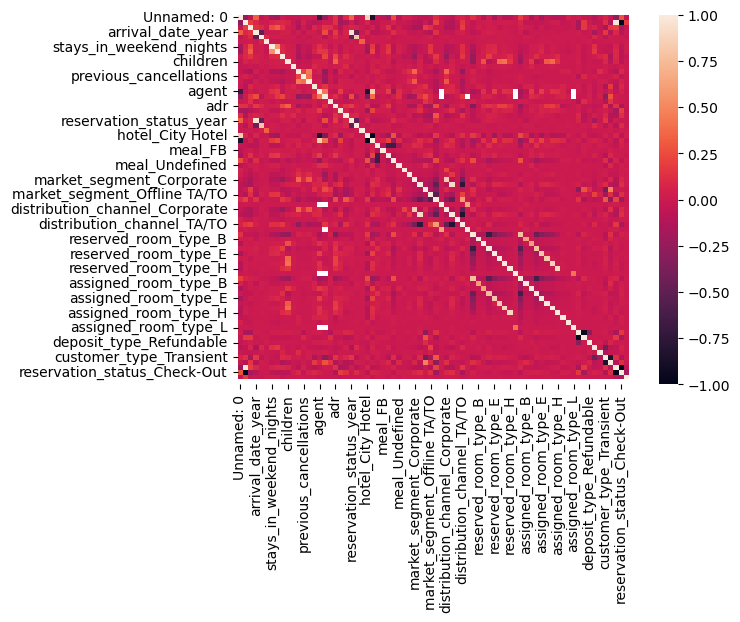

In [18]:
sns.heatmap(corr_matrix)

### Correlation and Causation
**Correlation**: measures the extent of interdepedence between variables

**Causation**: the relationship between cause and effect between 2 variables

#### Pearson Correlation
Measure the linear dependence between two variables. The result coefficient is a value
between -1, 1. 
`Pearson Correlation` is default method in pandas `corr()` method

In [20]:
# do a correlation between 'is_canceled' and 'children'
corr_matrix_two = final_df[['is_canceled','children']].corr()
corr_matrix_two

,is_canceled,children
is_canceled,1.000000,0.066138
children,0.066138,1.000000


In [22]:
#sns.heatmap(corr_matrix_two)


Sometimes we want to know the significance of the correlation

#### P-value
The probability value that the correlation between the variables is statistically significant

Normally we choose a significance level of `0.05`, which means we are `95%` confident

P-Values
- $<$ 0.001: we say there is a `strong` evidence
- $<$ 0.05: we say there is `moderate` evidence
- $<$ 0.1: we say there is `weak` evidence
- $>$ 0.1: we say there is `no` evidence

In [24]:
from scipy.stats import pearsonr, spearmanr

corr, p_value = pearsonr(final_df['is_canceled'], final_df['children'])
print(f'Pearson Correlation: [{corr}] , P_value: {p_value}')

Pearson Correlation: [0.06613799597281379] , P_value: 1.6224249318582763e-84
